Text(0.5, 1.0, 'Quantile')

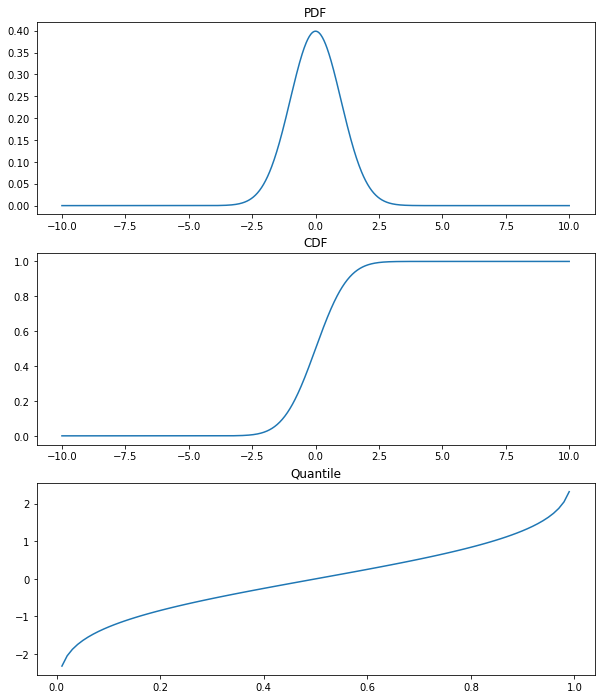

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special
from scipy import stats

# first sample from a gaussian
def gaussian(x, sigma, mu):
    return 1/(sigma*np.sqrt(2*np.pi)) * np.exp(-0.5*((x-mu)/sigma)**2)
#
def CDF_gaus(x, sigma, mu):
    return 0.5*(1 + special.erf((x-mu)/(sigma*np.sqrt(2))))
#
def ICDF_gaus(p, sigma, mu):
    return mu + sigma*np.sqrt(2)*special.erfinv(2*p - 1)
x = np.linspace(-10,10,1000)
p = np.linspace(0,1,100)
plt.figure(figsize=(10, 12))
plt.subplot(3,1,1)
plt.plot(x,gaussian(x, 1, 0))
plt.title('PDF')
plt.subplot(3,1,2)
plt.plot(x, CDF_gaus(x, 1, 0))
plt.title('CDF')
plt.subplot(3,1,3)
plt.plot(p, ICDF_gaus(p, 1, 0))
plt.title('Quantile')

0.5233727318192971


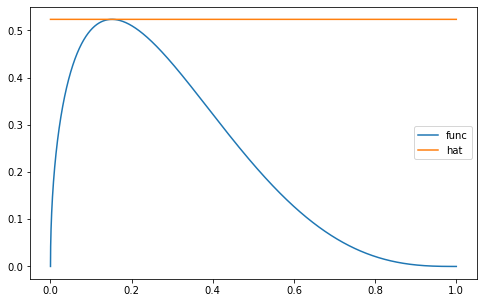

In [32]:
# untractable function
def f(x): # defined on x in [0,inf]
    return 2.13*np.sqrt(x)*(1-x)**2.8

# The hat function is a highly tractable function (in this case a continuously uniform distribution) from which we
# can throw values
def hat(x, a=0, b=1):
    return scipy.stats.uniform.pdf(x, loc=a, scale=b-a)
# vectorize 
f = np.vectorize(f, otypes=[np.float])
hat = np.vectorize(hat, otypes=[np.float])
#
np.random.seed(0)
N = 10000
a = 0
b = 1
binWidth = 0.05
Nbins = int((b-a)/binWidth)
x = np.linspace(a, b, N)
C = max(f(x)/hat(x))
print(C)

plt.figure(figsize=(8,5))
plt.plot(x,f(x), label='func')
plt.plot(x,C*hat(x), label='hat')
plt.legend()

(array([1.67935865, 2.21283013, 2.10757118, 1.61237568, 1.23918487,
        0.91623129, 0.60284669, 0.27271636, 0.11004344, 0.01674574]),
 array([0.00160843, 0.09445977, 0.1873111 , 0.28016244, 0.37301378,
        0.46586512, 0.55871645, 0.65156779, 0.74441913, 0.83727047,
        0.93012181]),
 <BarContainer object of 10 artists>)

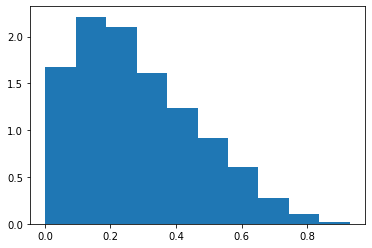

In [34]:
# vanilla
X = []
n = 10000

for i in range(n):
    x = np.random.uniform(a,b)
    if f(x)/(C*hat(x)) > np.random.uniform(0,1):
        X.append(x)
#
plt.hist(X)

10000
10000


(array([613., 886., 837., 732., 554., 388., 250., 140.,  44.,  29.]),
 array([7.58460312e-04, 8.98087400e-02, 1.78859020e-01, 2.67909299e-01,
        3.56959579e-01, 4.46009859e-01, 5.35060138e-01, 6.24110418e-01,
        7.13160698e-01, 8.02210977e-01, 8.91261257e-01]),
 <BarContainer object of 10 artists>)

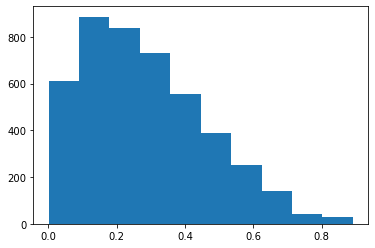

In [36]:
# vectorization implementation
proposed_samples = np.random.uniform(a, b, size=10000)

# accept-reject ratio
X = f(proposed_samples)/(C*hat(proposed_samples))

# accept-reject the samples
U = np.random.uniform(size=proposed_samples.shape[0])
accepted_samples = proposed_samples[X > U]
print(len(X))
print(len(U))

plt.hist(accepted_samples)